In [22]:
import os
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
data_dir = "/Users/asapp/Documents/VAST/sim_results/bridge"  

font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

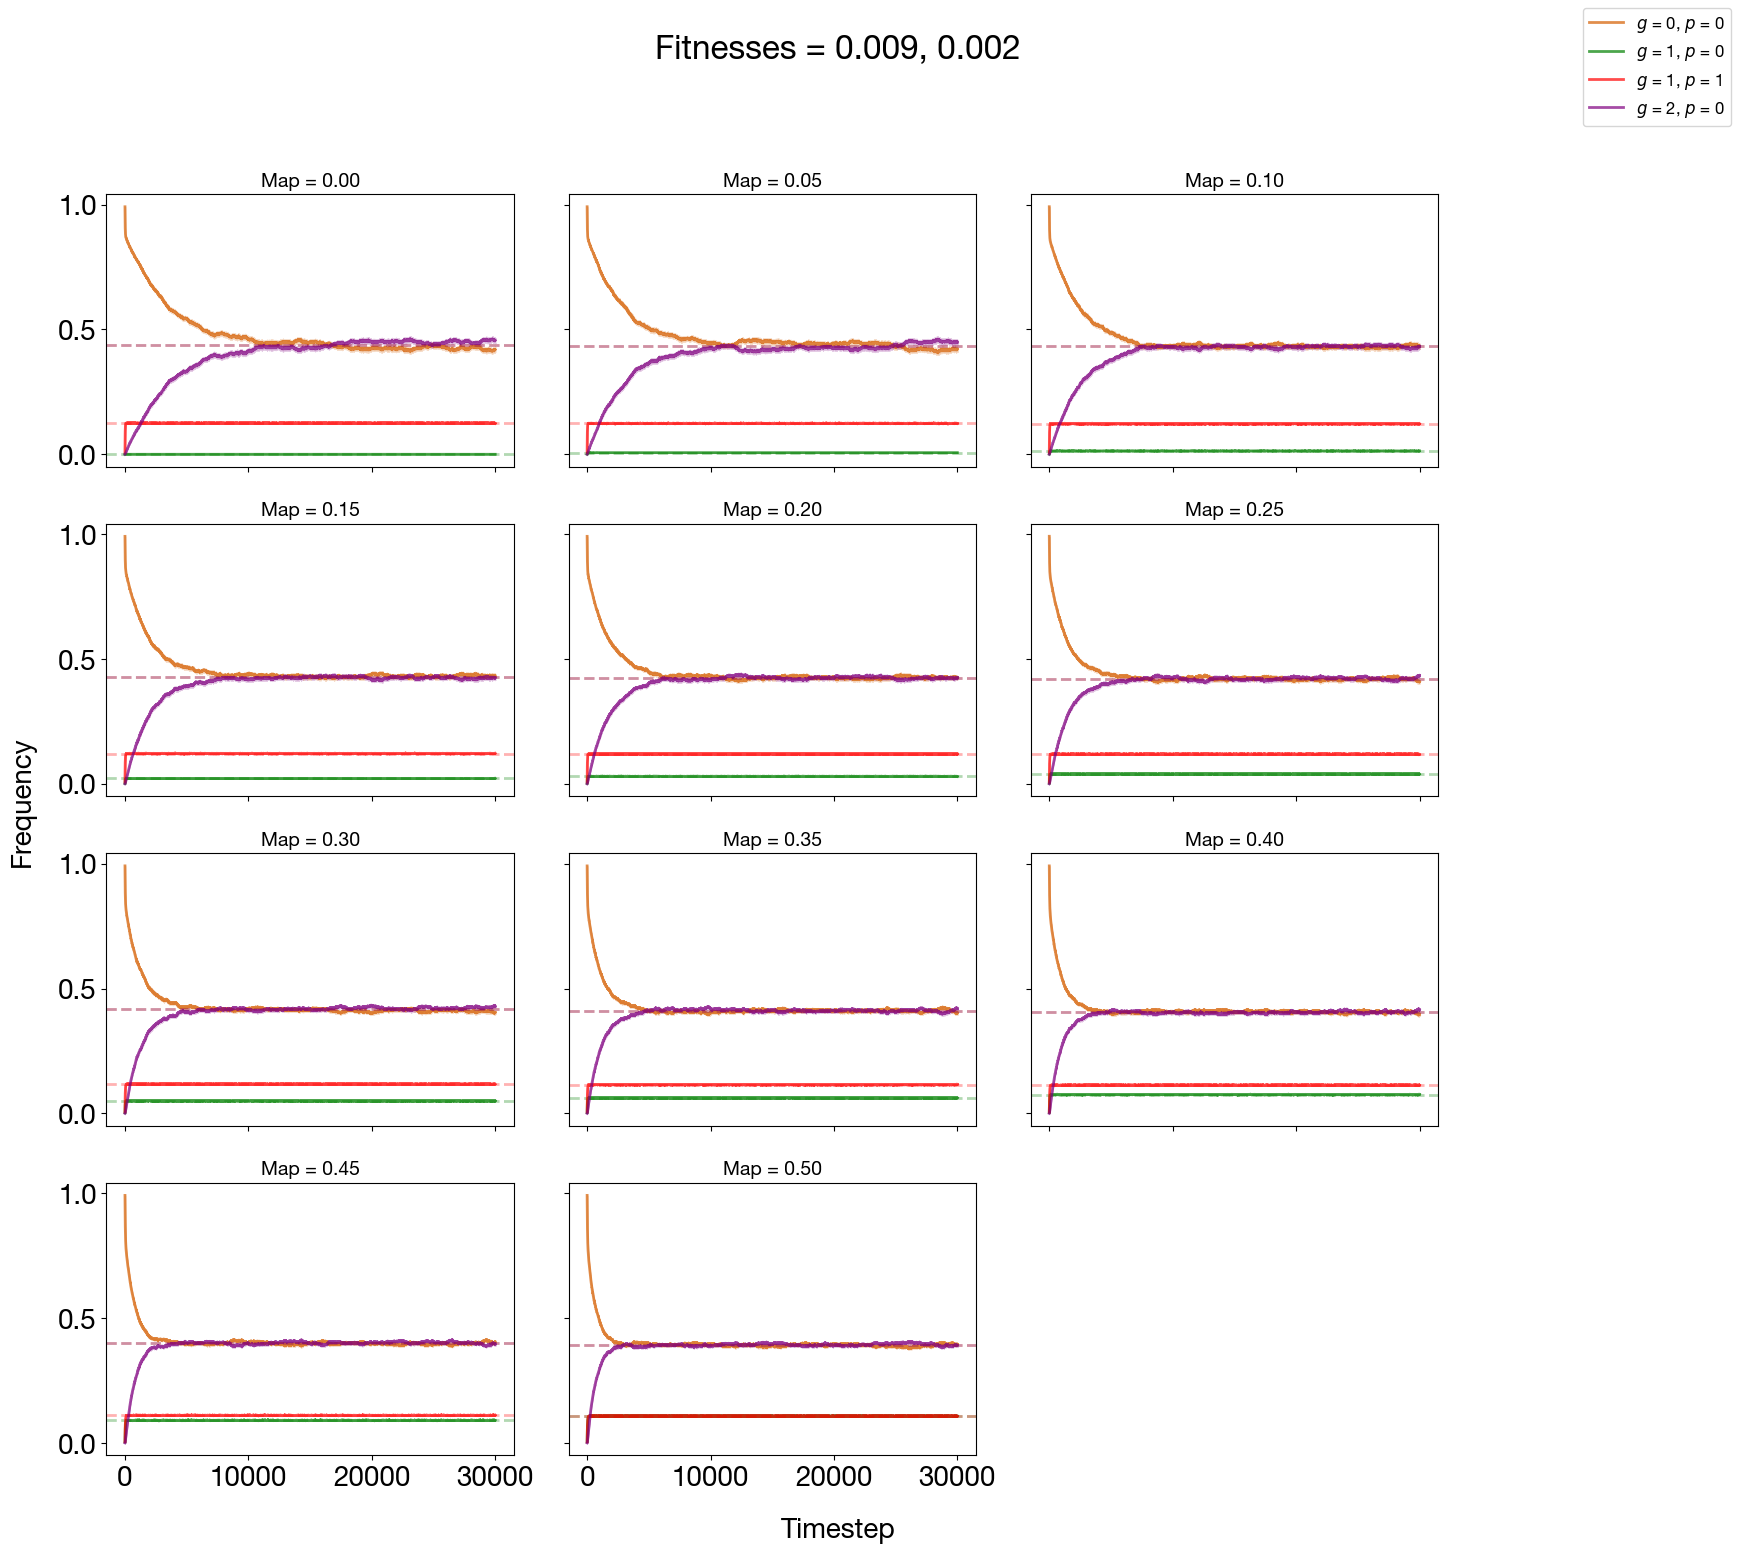

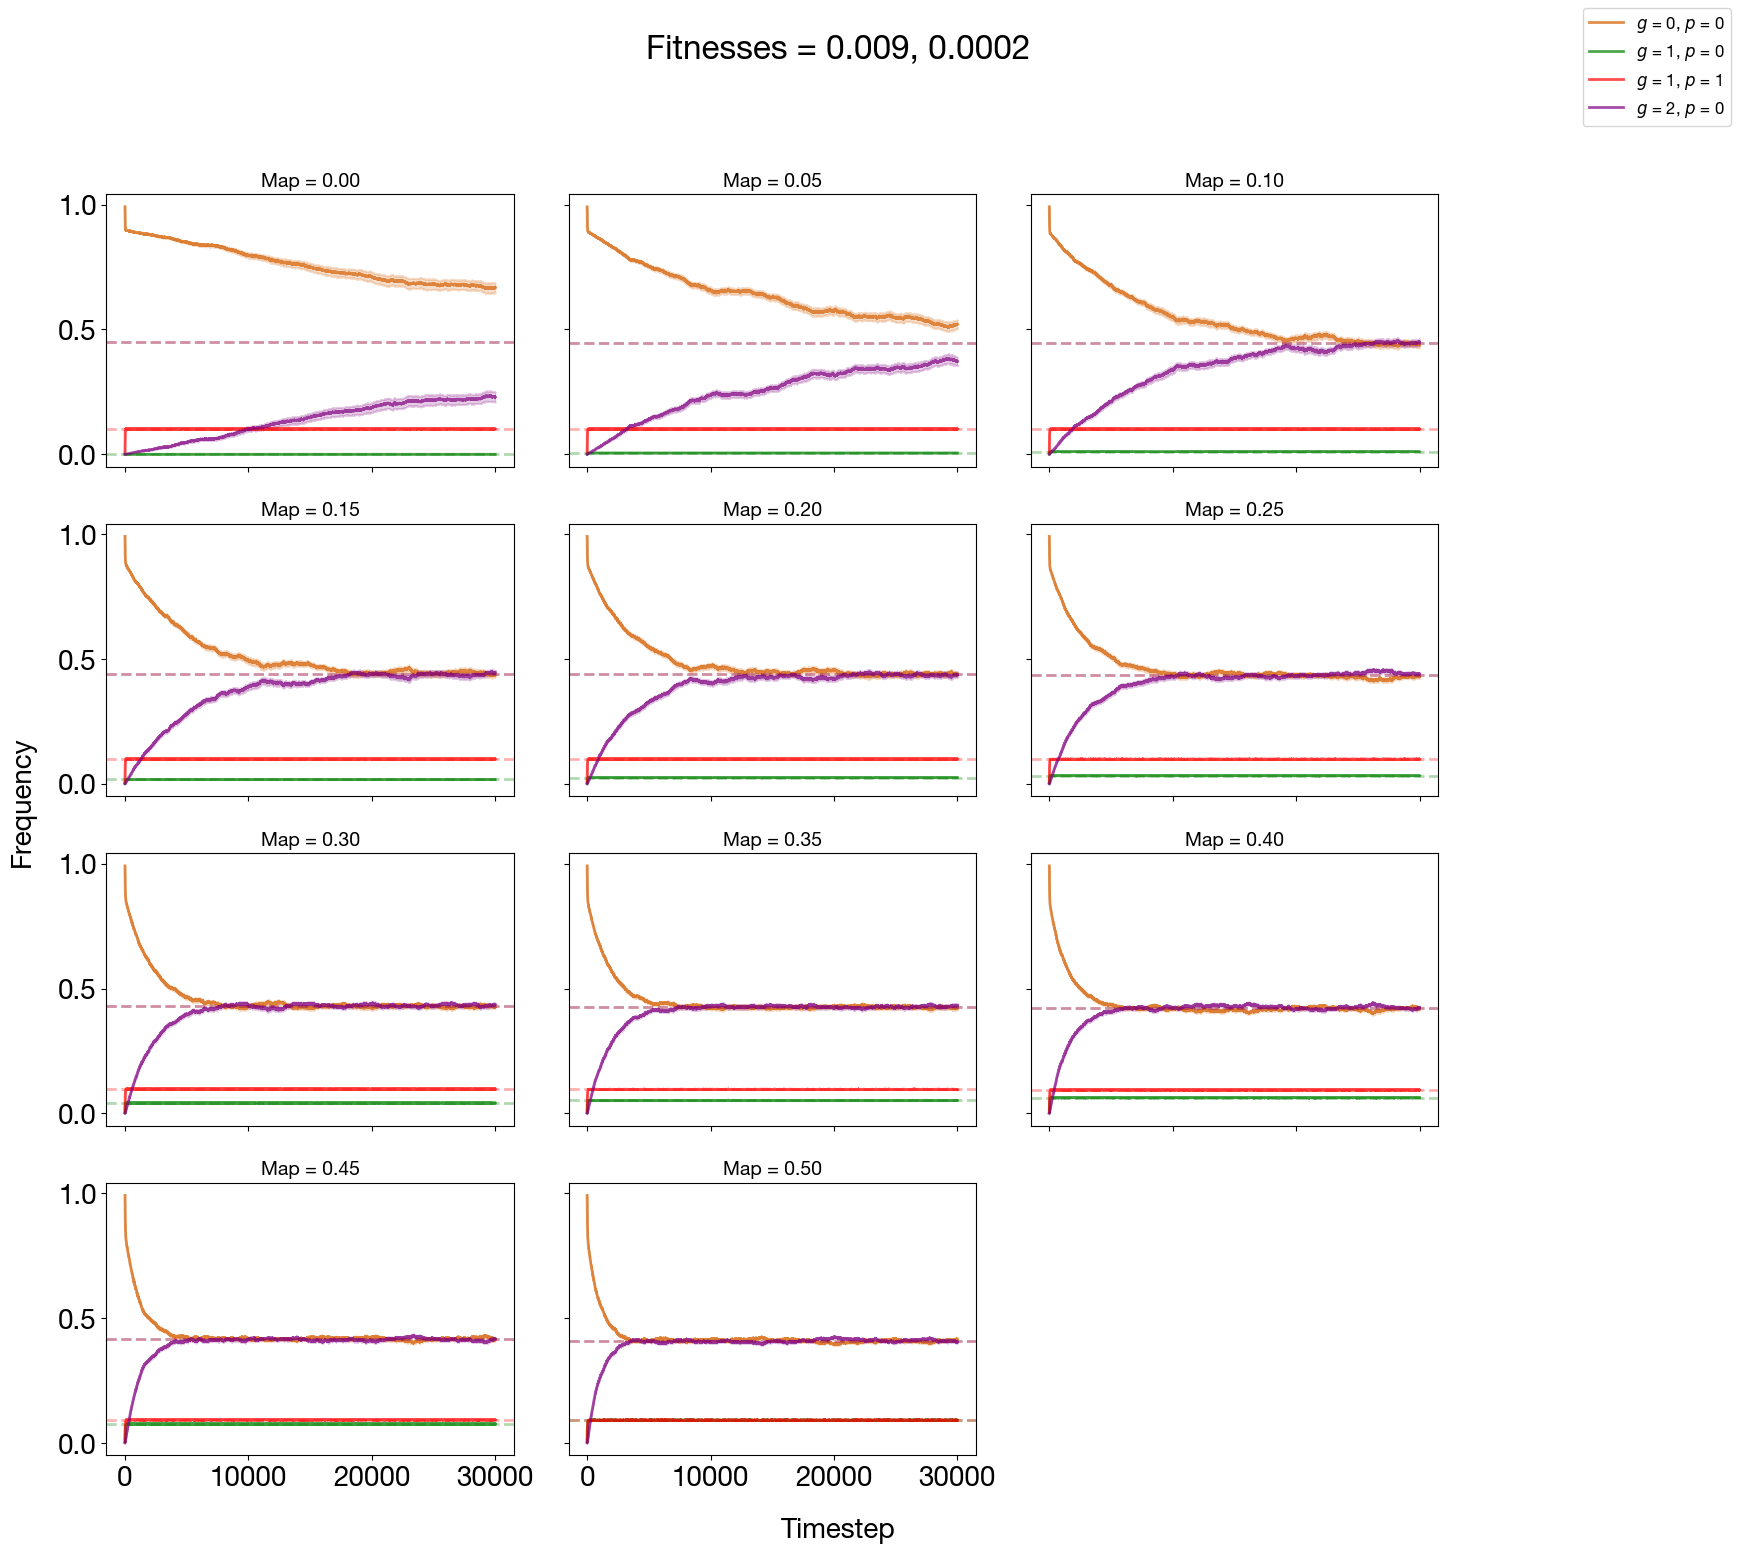

In [32]:
## HALF

# -------------------------
# Compute averages and plot in grids
# -------------------------
for fit in fits:
    # collect map values for this fit
    map_vals = sorted(
        set(map_val for (map_val, f) in groups.keys() if f == fit),
        key=lambda x: float(x),
        reverse=True   # so it goes 0.5 → 0.0
    )

    # keep only those ≤ 0.5
    map_vals = [m for m in map_vals if float(m) >= 0.5]

    n_maps = len(map_vals)
    ncols = 3  # adjust if you want
    nrows = math.ceil(n_maps / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows), sharex=True, sharey=True)
    axes = axes.flatten()

    # define colors for selected pairs
    node_colors = {
        (0,0): "#D55E00",
        (1,0): "green",
        (1,1): "red",
        (2,0): "purple"
    }

    for ax_idx, map_val in enumerate(map_vals):
        key = (map_val, fit)
        file_list = groups[key]

        trajectories = []

        # load all trials
        for fpath in file_list:
            with open(fpath, "rb") as f:
                data = pickle.load(f)
                trajectories.append(data["freq_timeseries"])
                theoretical_vals = np.array(data['f_eq']).reshape(3,2) # same for all

        trajectories = np.array(trajectories)  # (num_trials, Ng, Np, T)
        mean_traj = trajectories.mean(axis=0)
        sem_traj = trajectories.std(axis=0) / np.sqrt(len(trajectories))

        Ng, Np, T = mean_traj.shape
        timepoints = np.arange(T)

        # only plot selected pairs
        selected_pairs = [(0, 0), (1, 0), (1, 1), (2, 0)]

        ax = axes[ax_idx]

        # inside your plotting loop:
        for i in range(Ng):
            for j in range(Np):
                if (i, j) not in selected_pairs:
                    continue
                color = node_colors[(i,j)]
                line, = ax.plot(
                    timepoints,
                    mean_traj[i, j, :],
                    label=f'$g$ = {i}, $p$ = {j}',
                    alpha=0.7,
                    linewidth=2.0,
                    color=color
                )
                ax.fill_between(
                    timepoints,
                    mean_traj[i, j, :] - sem_traj[i, j, :],
                    mean_traj[i, j, :] + sem_traj[i, j, :],
                    alpha=0.2,
                    color=color
                )
                th = theoretical_vals[i, j]
                ax.axhline(th, linestyle="--", linewidth=2,
                        alpha=0.3, color=color)

        map_display = 1 - float(map_val)
        ax.set_title(f"Map = {map_display:.2f}", fontsize=14)

    # remove any unused subplots if grid isn’t full
    for k in range(ax_idx+1, len(axes)):
        fig.delaxes(axes[k])

    # add shared labels, legend once
    fig.text(0.5, 0.04, "Timestep", ha="center")
    fig.text(0.04, 0.5, "Frequency", va="center", rotation="vertical")

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, fontsize=12, loc="upper right", ncol=1)

    fig.suptitle(f"Fitnesses = 0.009, {fit}")
    fig.tight_layout(rect=[0.05, 0.05, 0.85, 0.95])
    plt.savefig(f"/Users/asapp/Documents/VAST/r4_figs/bridge_{fit}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

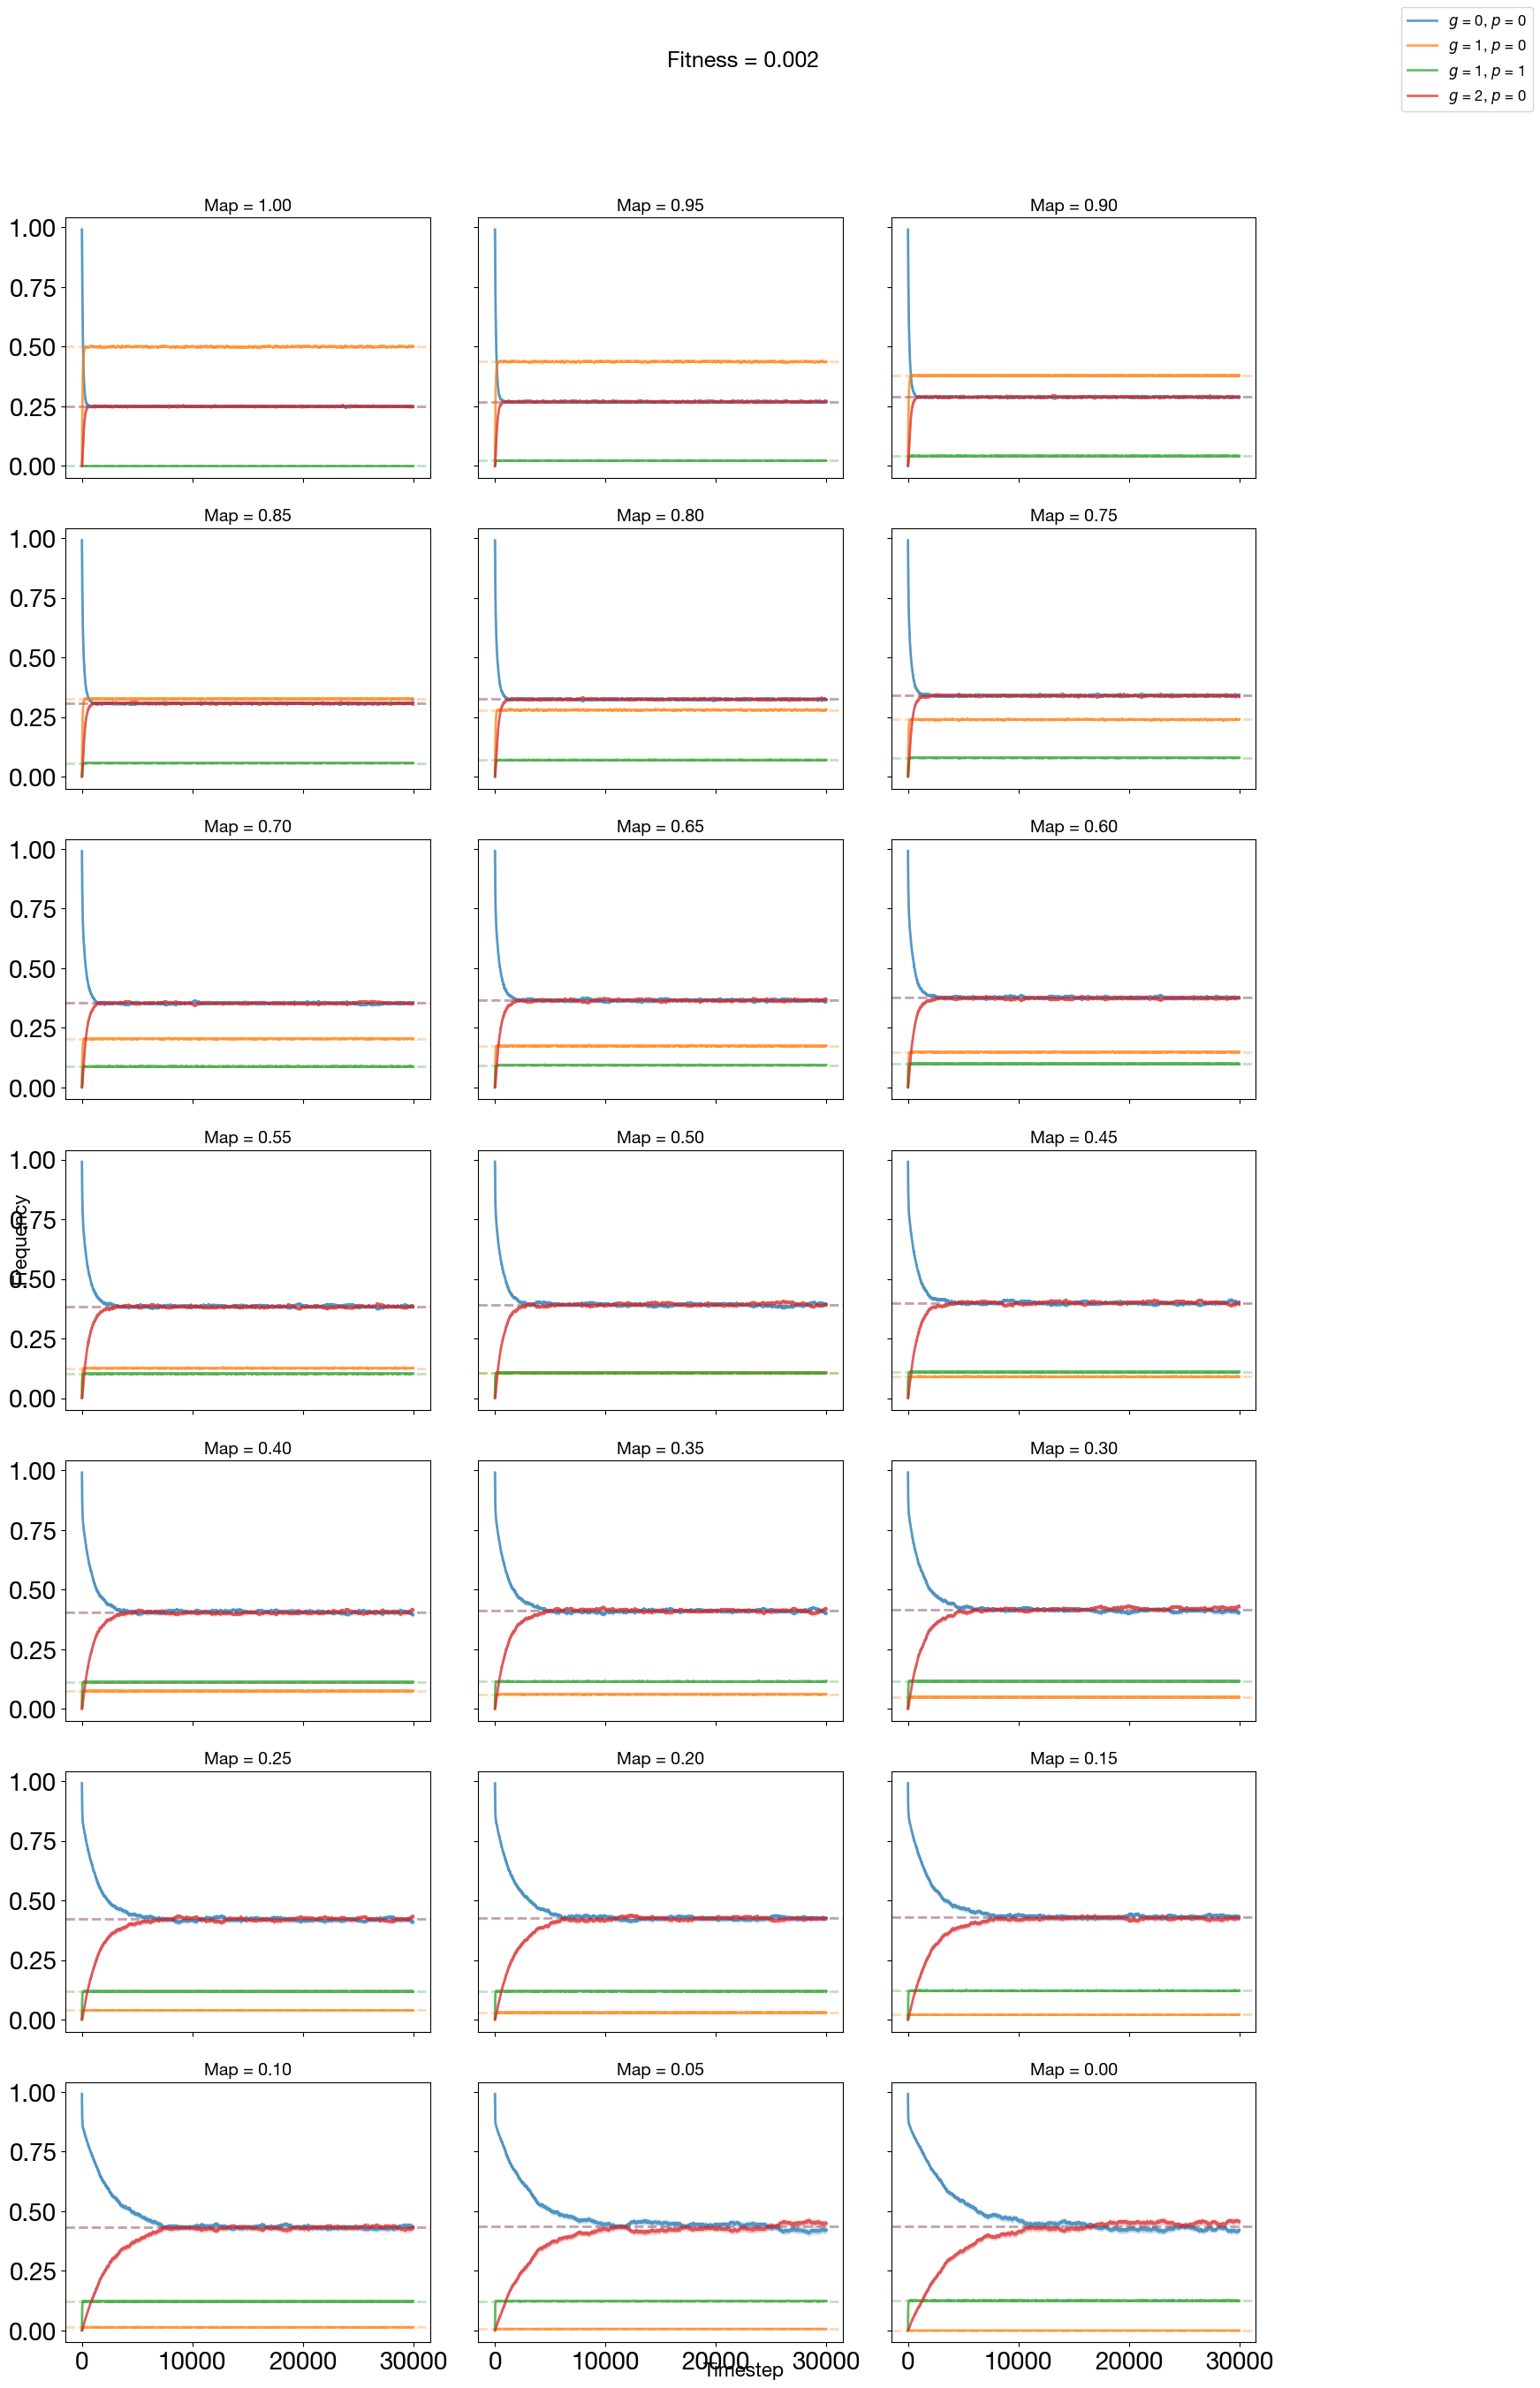

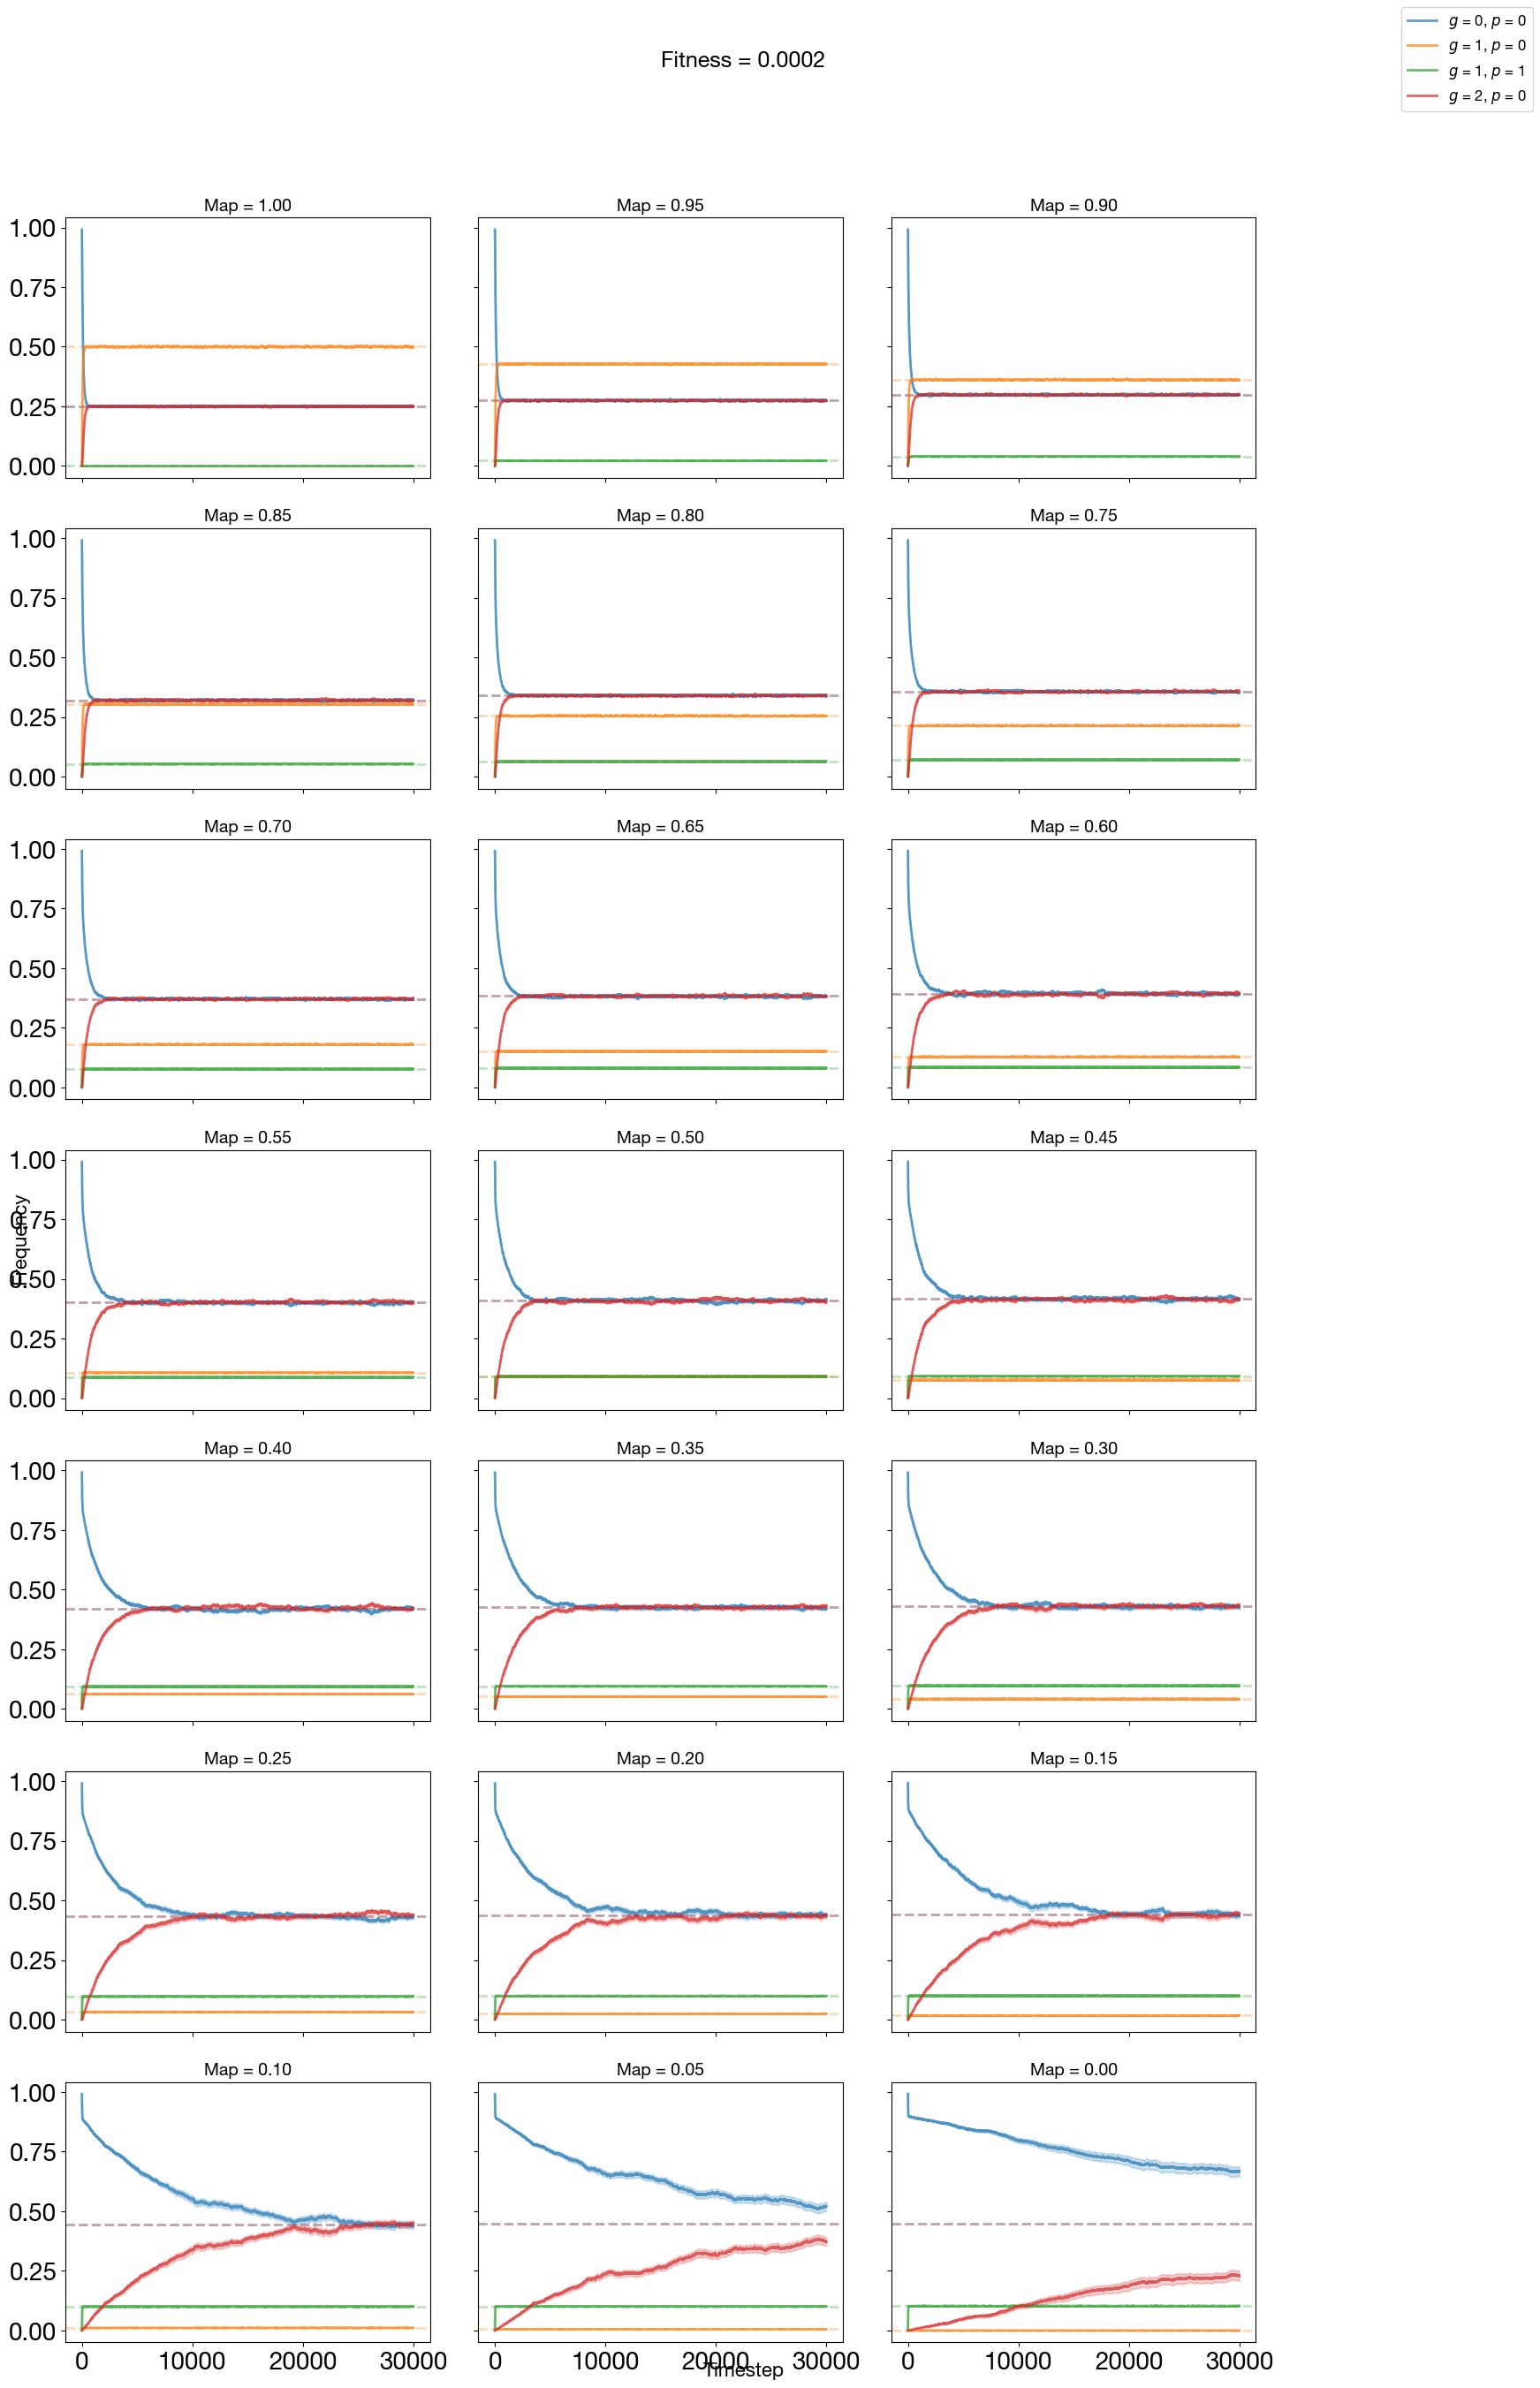

In [19]:
### ALL 

# -------------------------
# Compute averages and plot in grids
# -------------------------
for fit in fits:
    map_vals = sorted(
        set(map_val for (map_val, f) in groups.keys() if f == fit),
        key=lambda x: float(x)
    )

    n_maps = len(map_vals)
    ncols = 3  # you can adjust this (e.g. 3 columns per row)
    nrows = math.ceil(n_maps / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows), sharex=True, sharey=True)
    axes = axes.flatten()

    for ax_idx, map_val in enumerate(map_vals):
        key = (map_val, fit)
        file_list = groups[key]

        trajectories = []

        # load all trials
        for fpath in file_list:
            with open(fpath, "rb") as f:
                data = pickle.load(f)
                trajectories.append(data["freq_timeseries"])
                theoretical_vals = np.array(data['f_eq']).reshape(3,2) # same for all

        trajectories = np.array(trajectories)  # (num_trials, Ng, Np, T)
        mean_traj = trajectories.mean(axis=0)
        sem_traj = trajectories.std(axis=0) / np.sqrt(len(trajectories))

        Ng, Np, T = mean_traj.shape
        timepoints = np.arange(T)

        # only plot selected pairs
        selected_pairs = [(0, 0), (1, 0), (1, 1), (2, 0)]

        ax = axes[ax_idx]

        for i in range(Ng):
            for j in range(Np):
                if (i, j) not in selected_pairs:
                    continue
                line, = ax.plot(
                    timepoints,
                    mean_traj[i, j, :],
                    label=f'$g$ = {i}, $p$ = {j}',
                    alpha=0.7,
                    linewidth=2.0
                )
                ax.fill_between(
                    timepoints,
                    mean_traj[i, j, :] - sem_traj[i, j, :],
                    mean_traj[i, j, :] + sem_traj[i, j, :],
                    alpha=0.2,
                    color=line.get_color()
                )
                th = theoretical_vals[i, j]
                ax.axhline(th, linestyle="--", linewidth=2,
                           alpha=0.3, color=line.get_color())

        map_display = 1 - float(map_val)
        ax.set_title(f"Map = {map_display:.2f}", fontsize=14)

    # remove any unused subplots if grid isn’t full
    for k in range(ax_idx+1, len(axes)):
        fig.delaxes(axes[k])

    # add shared labels, legend once
    fig.text(0.5, 0.04, "Timestep", ha="center", fontsize=16)
    fig.text(0.04, 0.5, "Frequency", va="center", rotation="vertical", fontsize=16)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, fontsize=12, loc="upper right", ncol=1)

    fig.suptitle(f"Fitness = {fit}", fontsize=18)
    fig.tight_layout(rect=[0.03, 0.03, 0.85, 0.95])
    plt.show()

Fit=0.002, Map=1.0


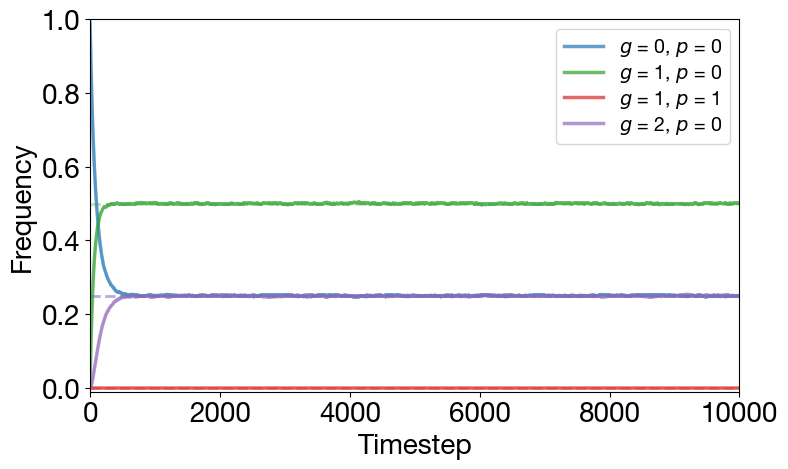

Fit=0.002, Map=0.95


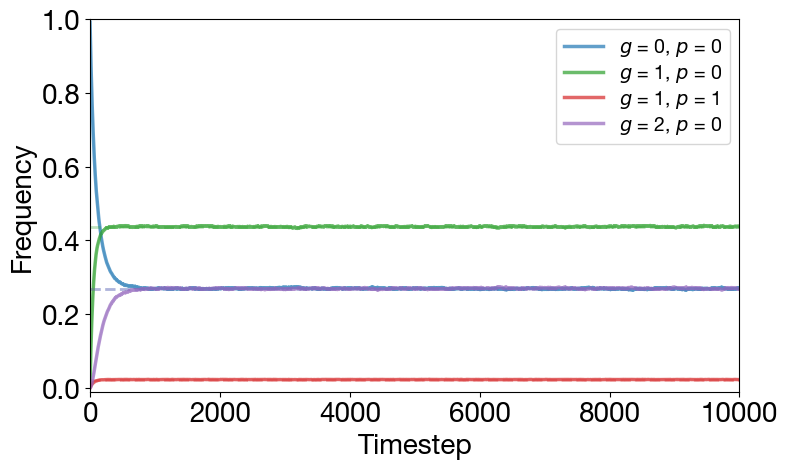

Fit=0.002, Map=0.9


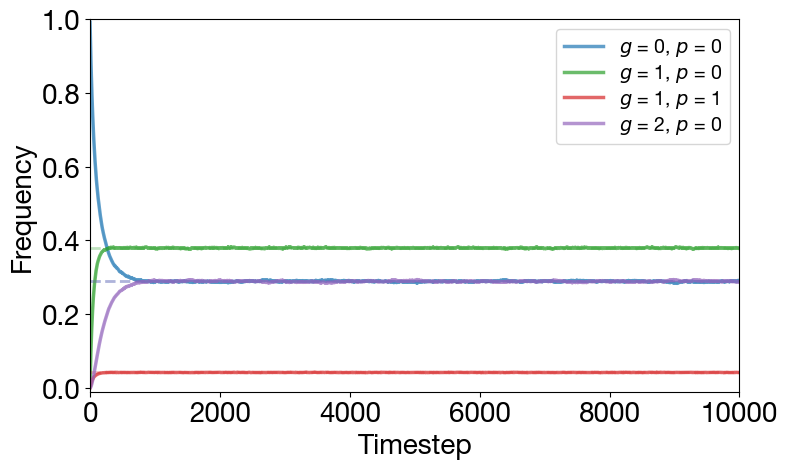

Fit=0.002, Map=0.85


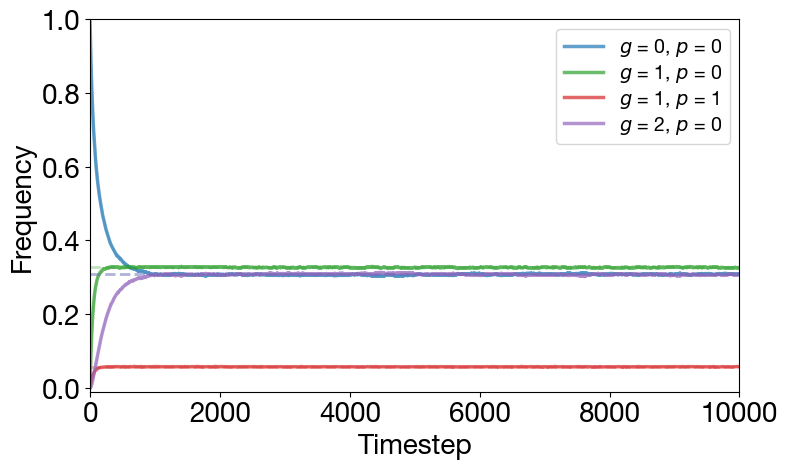

Fit=0.002, Map=0.8


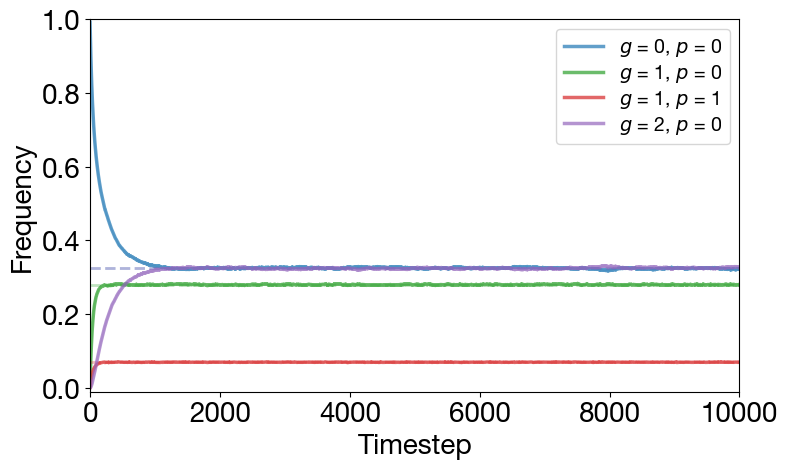

Fit=0.002, Map=0.75


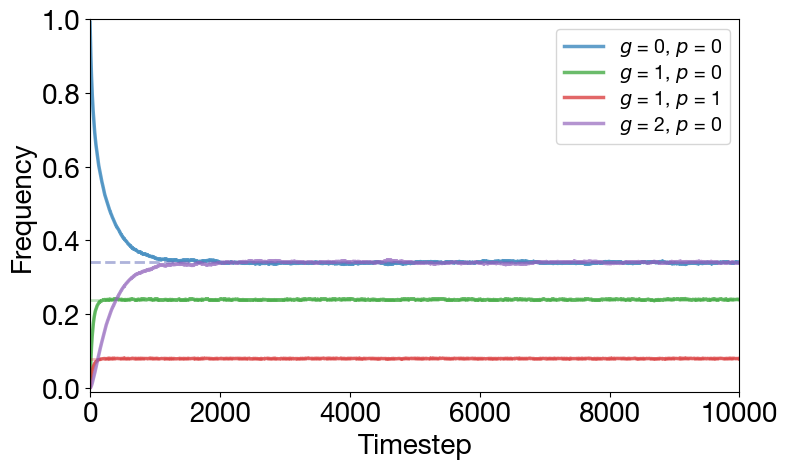

Fit=0.002, Map=0.7


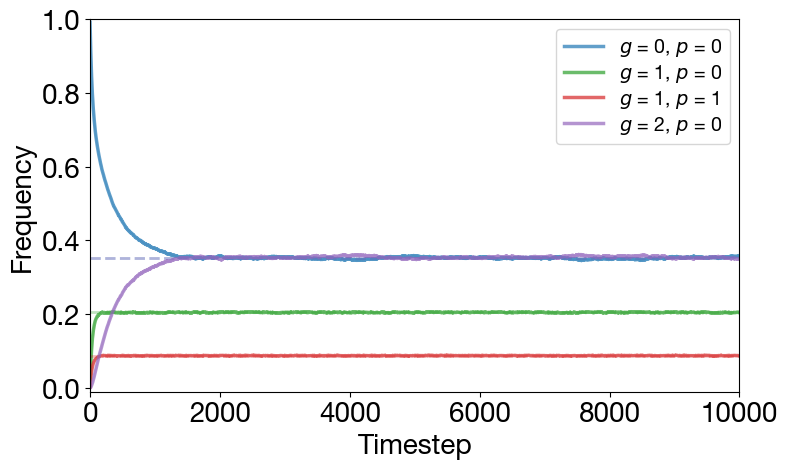

Fit=0.002, Map=0.65


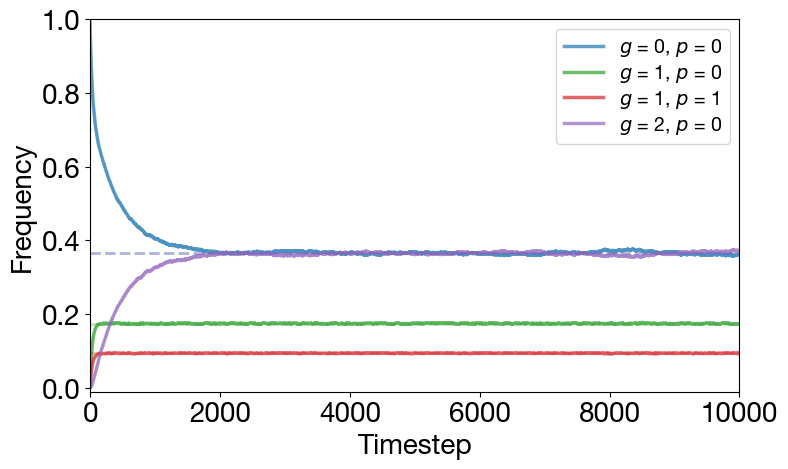

Fit=0.002, Map=0.6


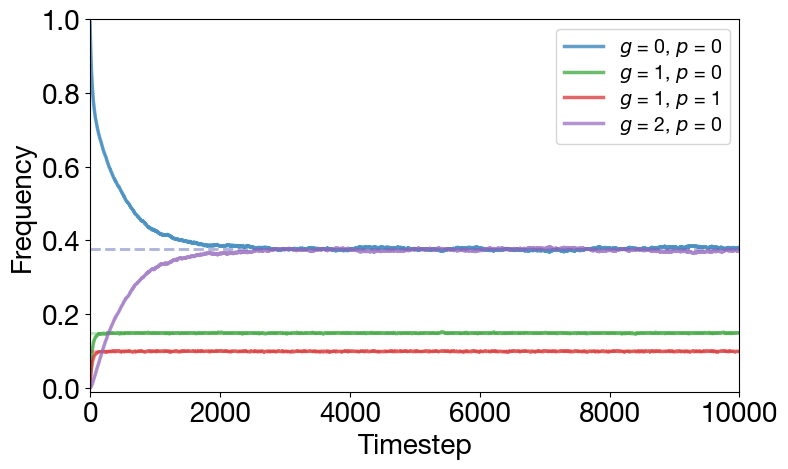

Fit=0.002, Map=0.55


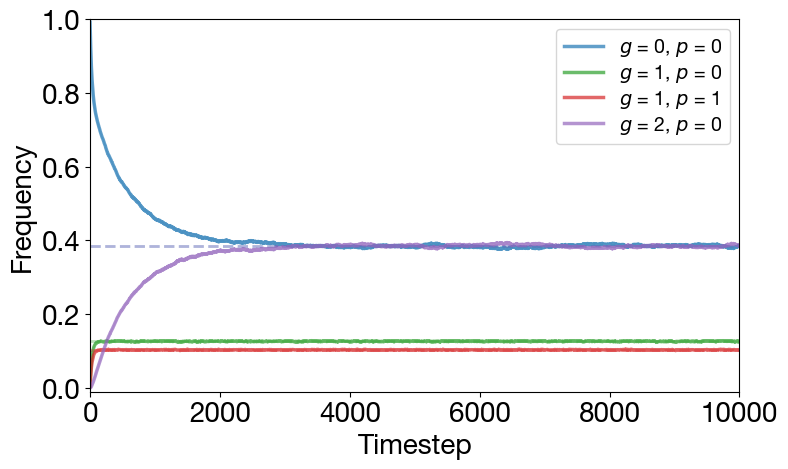

Fit=0.002, Map=0.5


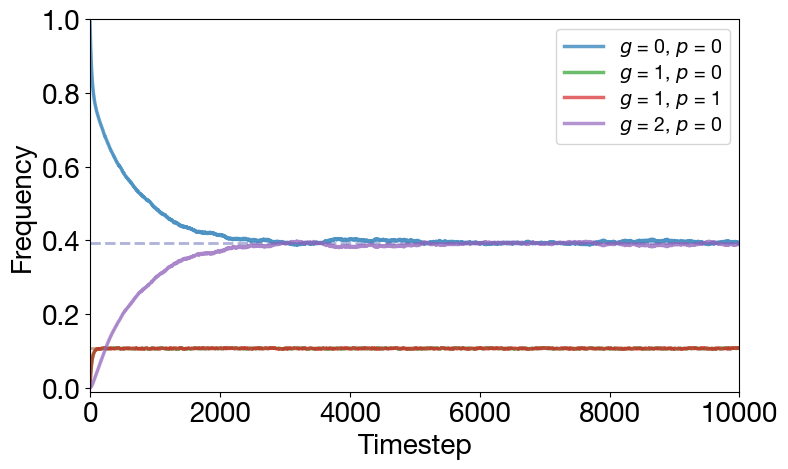

Fit=0.002, Map=0.44999999999999996


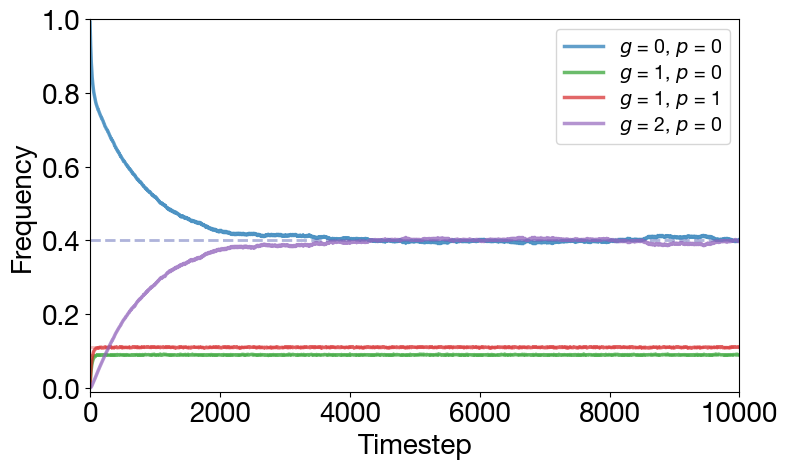

Fit=0.002, Map=0.4


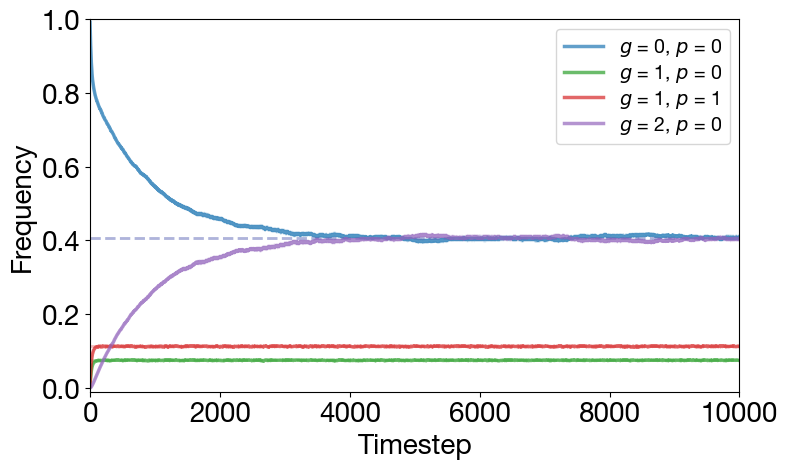

Fit=0.002, Map=0.35


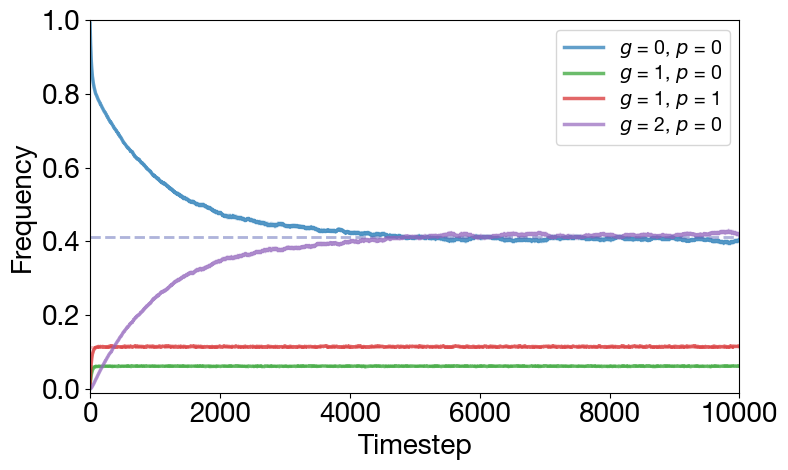

Fit=0.002, Map=0.30000000000000004


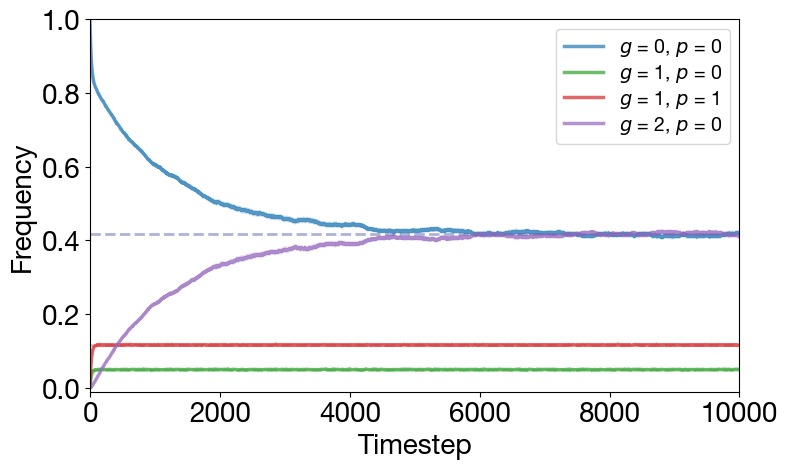

Fit=0.002, Map=0.25


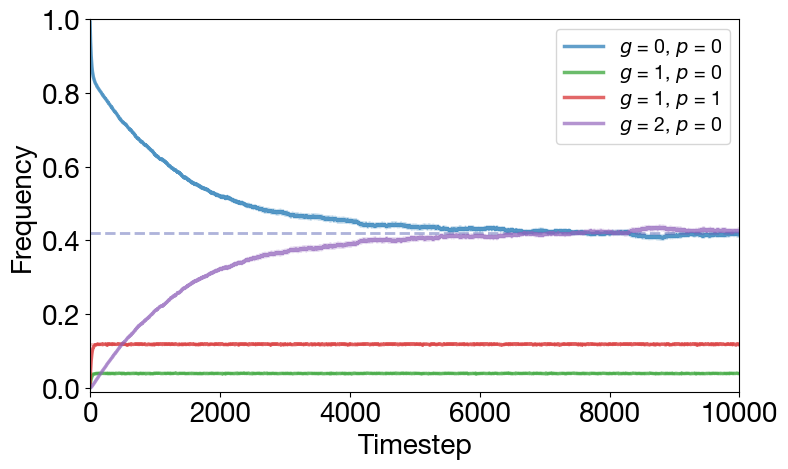

Fit=0.002, Map=0.19999999999999996


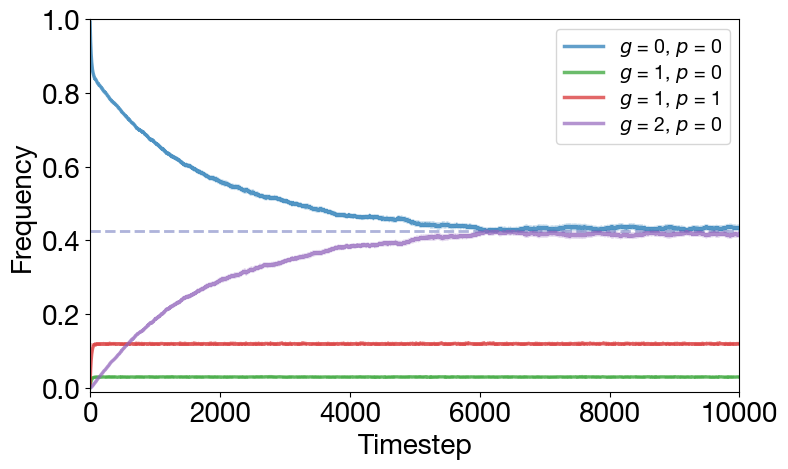

Fit=0.002, Map=0.15000000000000002


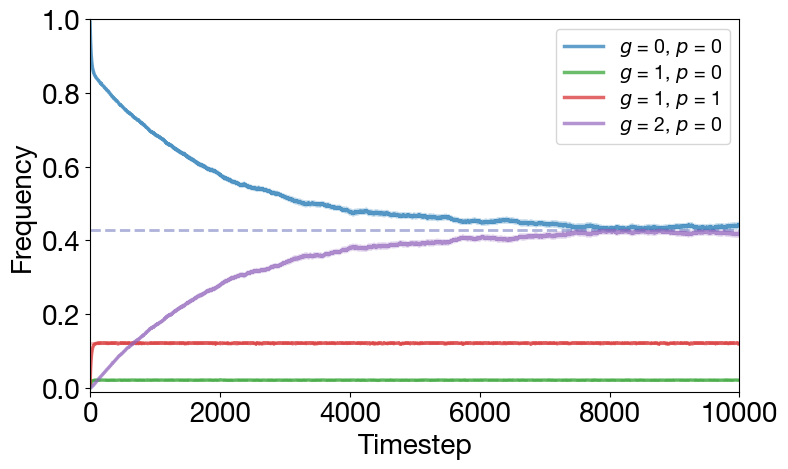

Fit=0.002, Map=0.09999999999999998


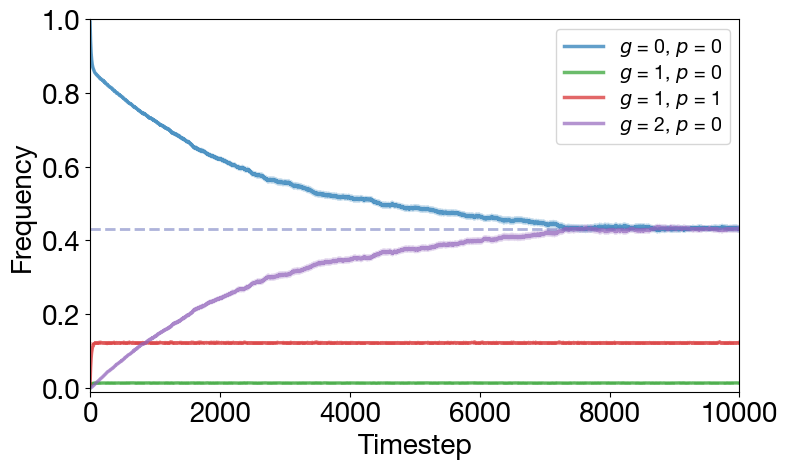

Fit=0.002, Map=0.050000000000000044


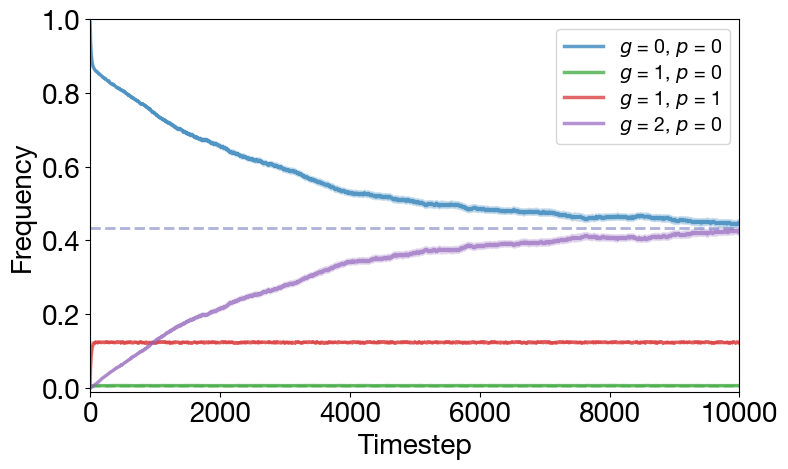

Fit=0.002, Map=0.0


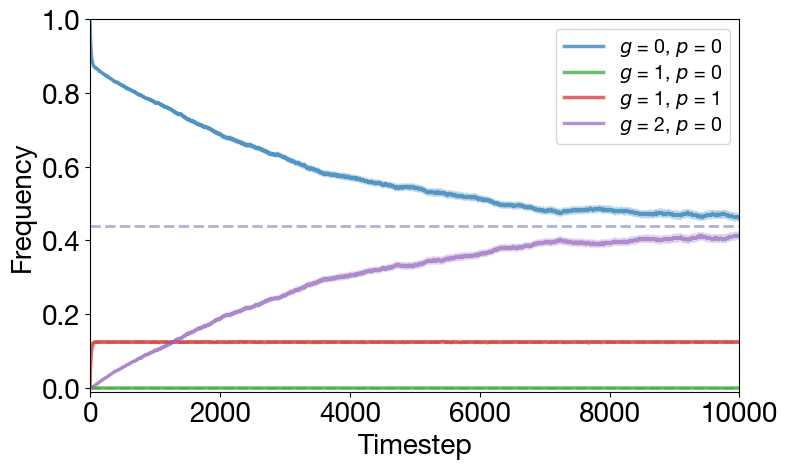

Fit=0.0002, Map=1.0


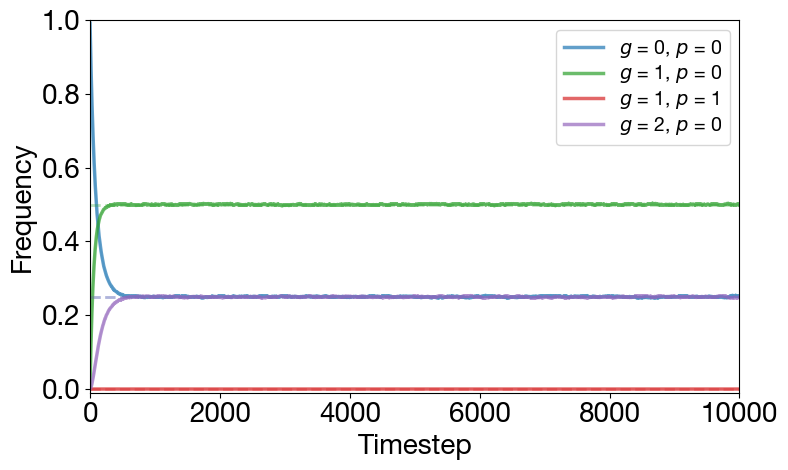

Fit=0.0002, Map=0.95


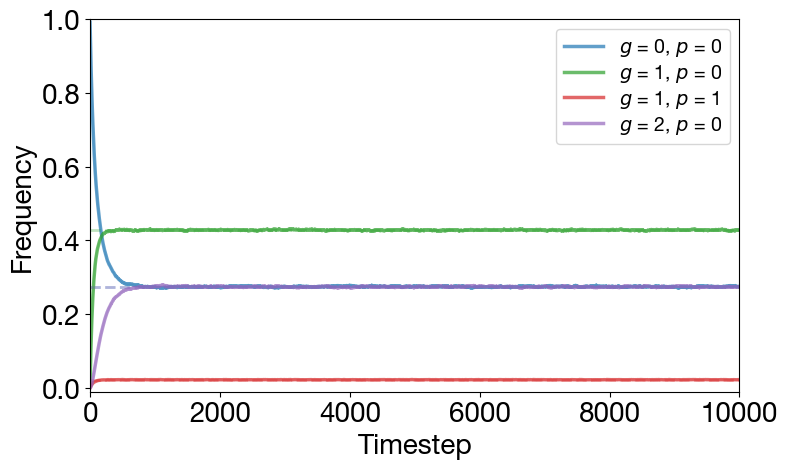

Fit=0.0002, Map=0.9


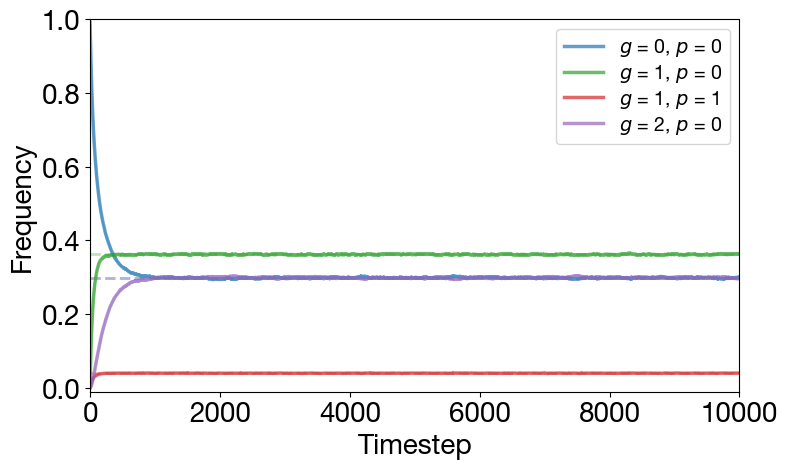

Fit=0.0002, Map=0.85


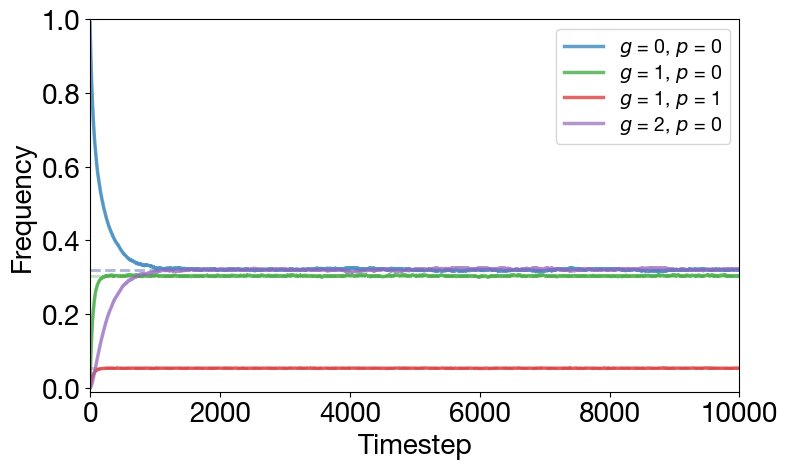

Fit=0.0002, Map=0.8


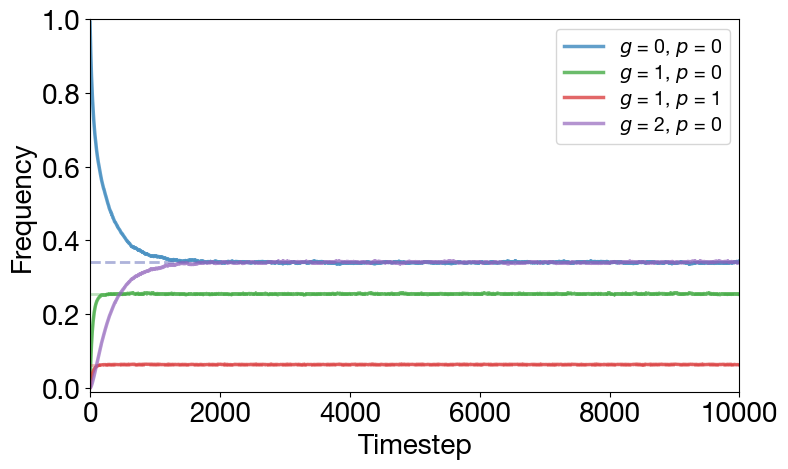

Fit=0.0002, Map=0.75


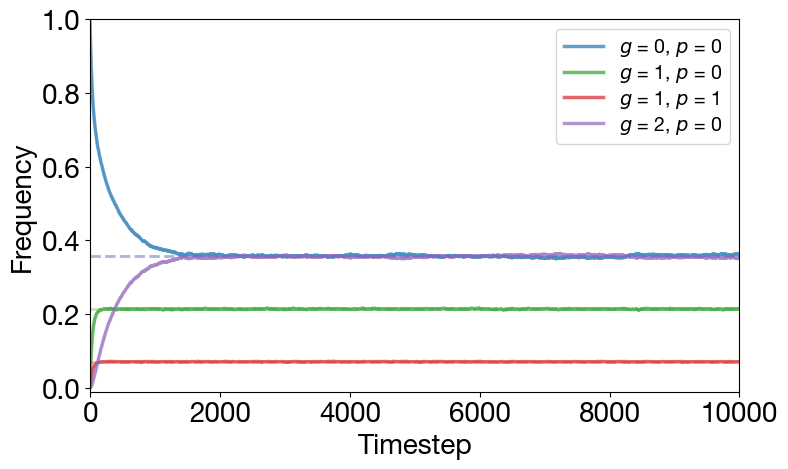

Fit=0.0002, Map=0.7


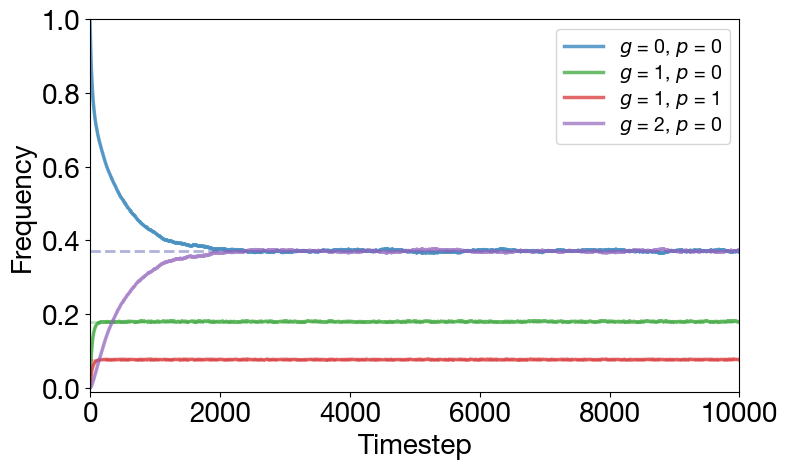

Fit=0.0002, Map=0.65


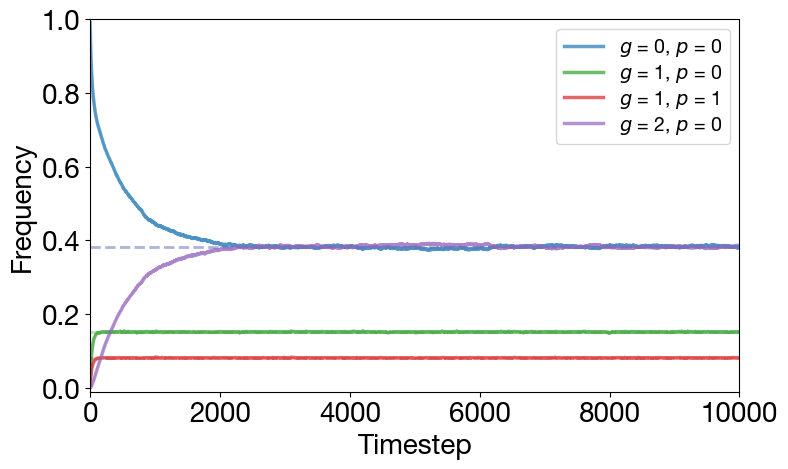

Fit=0.0002, Map=0.6


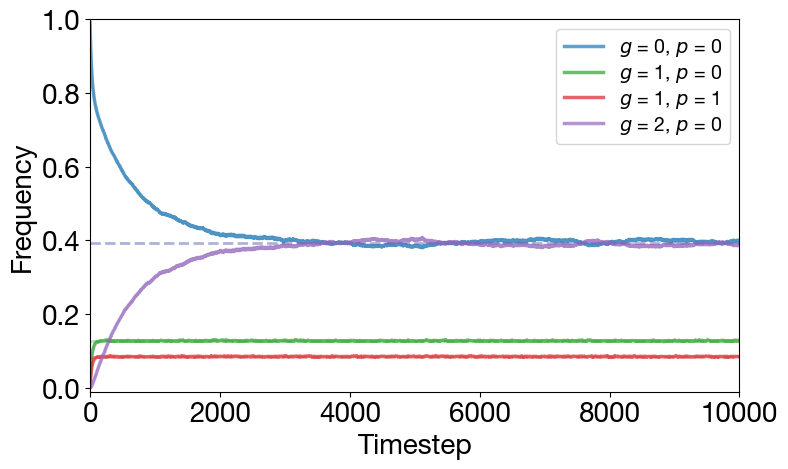

Fit=0.0002, Map=0.55


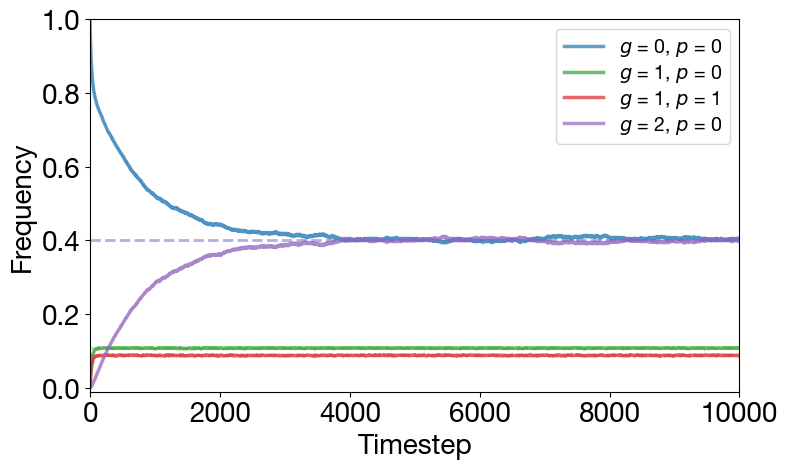

Fit=0.0002, Map=0.5


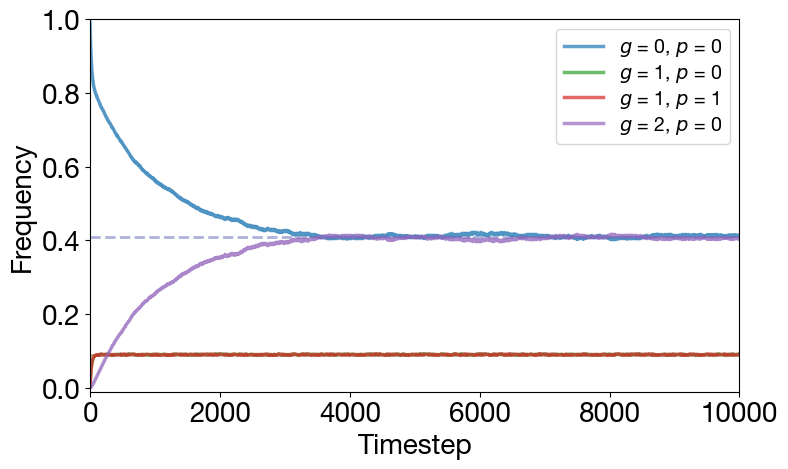

Fit=0.0002, Map=0.44999999999999996


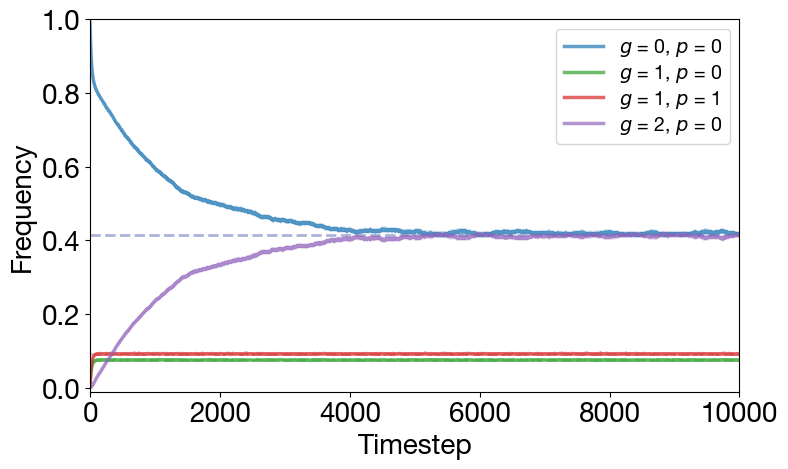

Fit=0.0002, Map=0.4


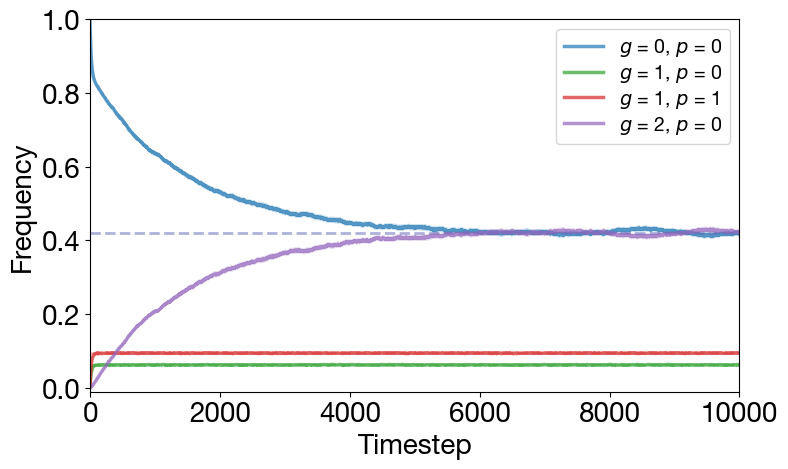

Fit=0.0002, Map=0.35


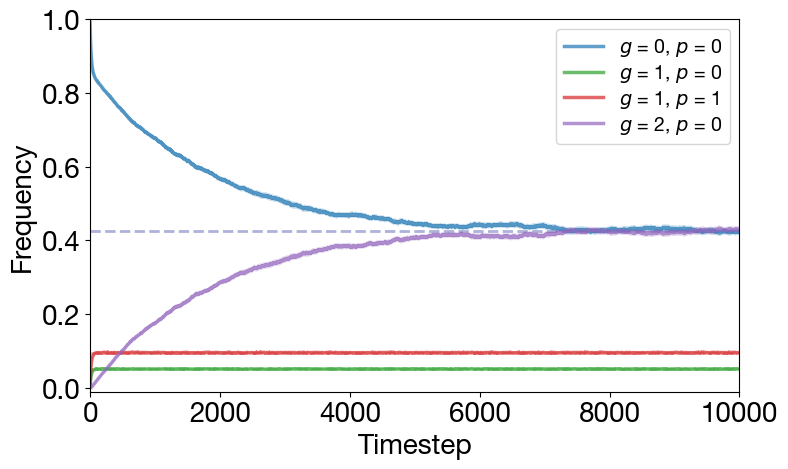

Fit=0.0002, Map=0.30000000000000004


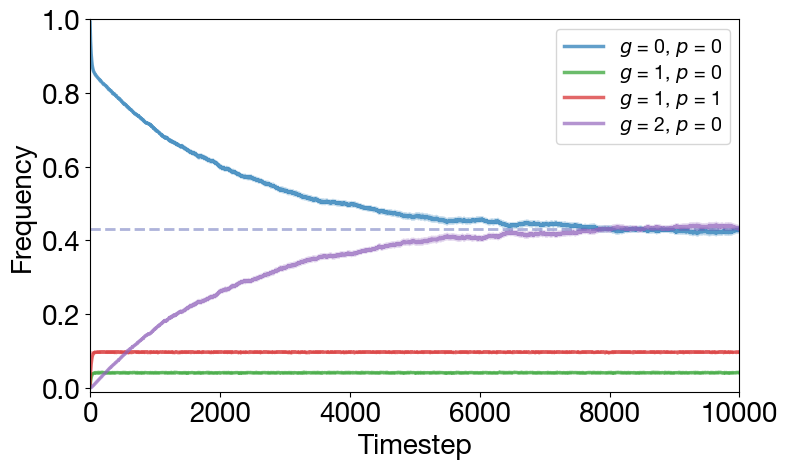

Fit=0.0002, Map=0.25


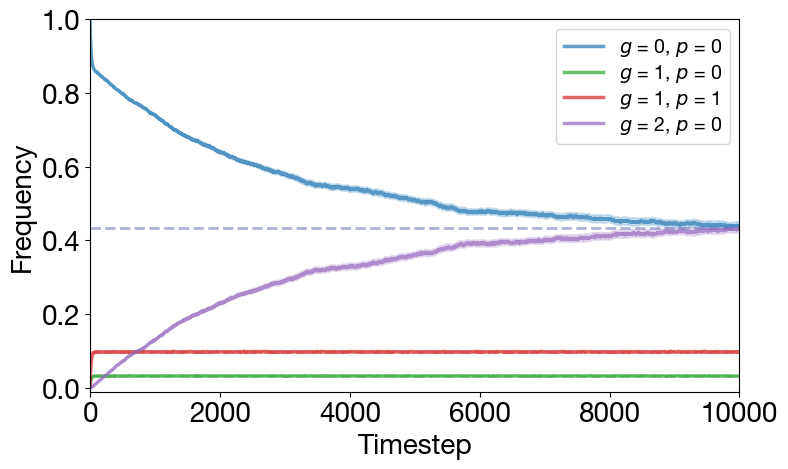

Fit=0.0002, Map=0.19999999999999996


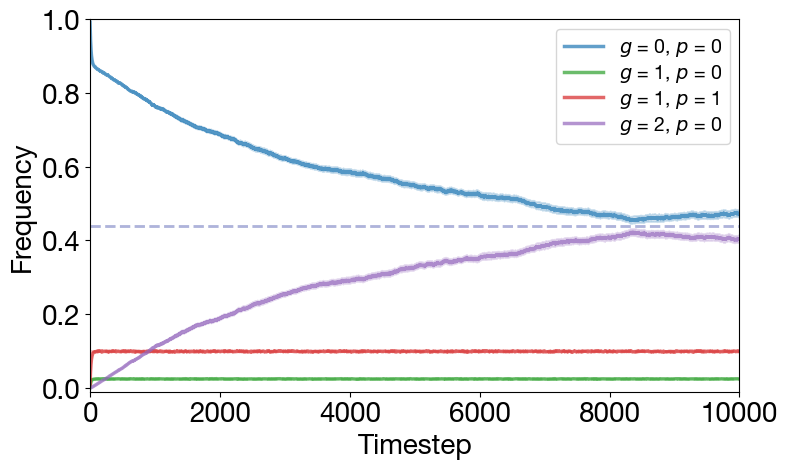

Fit=0.0002, Map=0.15000000000000002


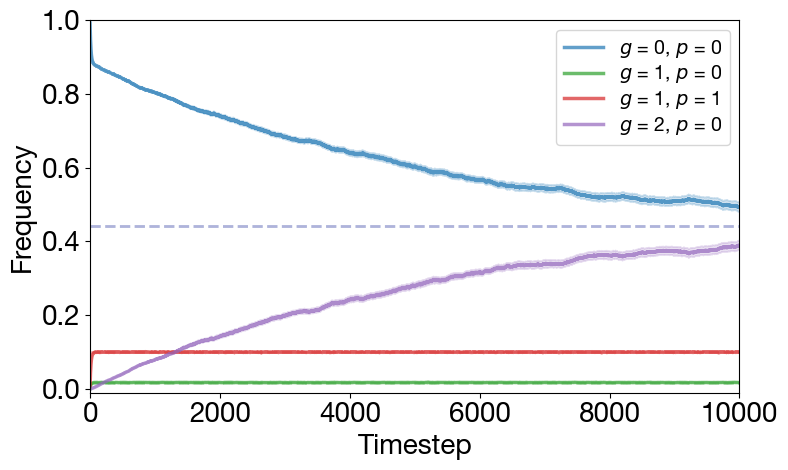

Fit=0.0002, Map=0.09999999999999998


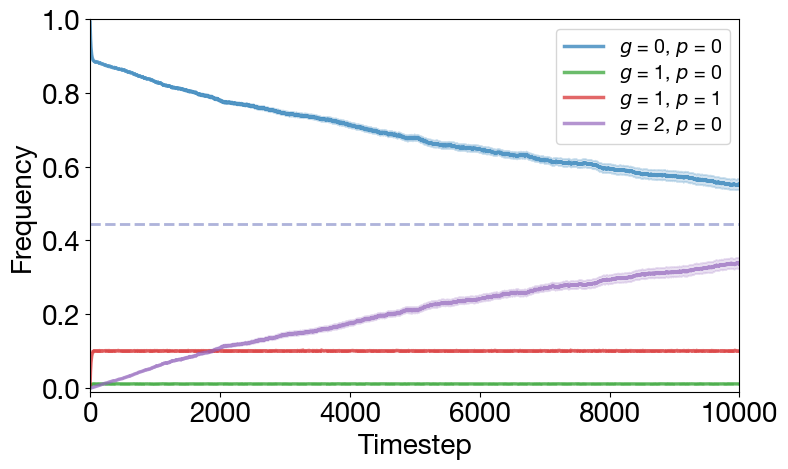

Fit=0.0002, Map=0.050000000000000044


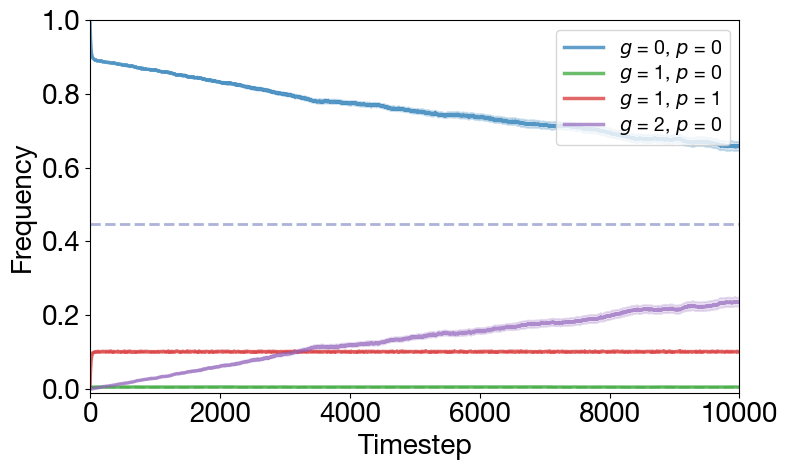

Fit=0.0002, Map=0.0


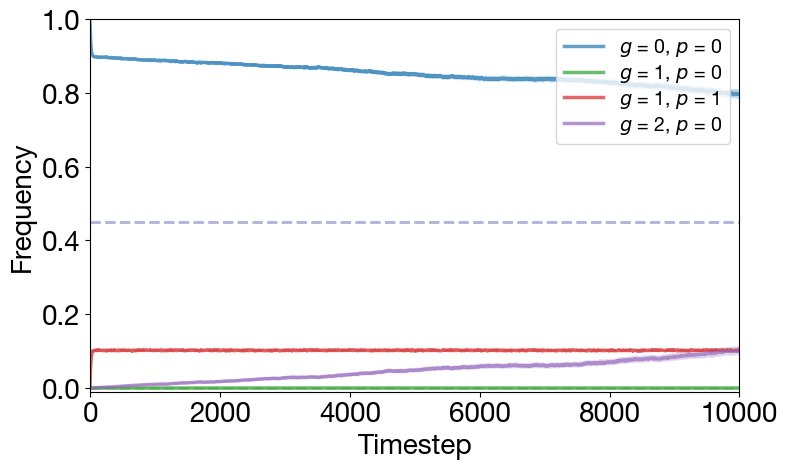

In [17]:
# -------------------------
# Settings
# -------------------------
fits = ["0.002", "0.0002"]         # fitness values 

# regex to parse filenames
pattern = re.compile(r"sim_data_map_(.*?)_fit_(.*?)_trial_(\d+)\.pkl")

# collect files
files = os.listdir(data_dir)

# organize files by (map, fit)
groups = {}
for fname in files:
    match = pattern.match(fname)
    if match:
        map_val, fit_val, trial = match.groups()
        key = (map_val, fit_val)
        groups.setdefault(key, []).append(os.path.join(data_dir, fname))

# -------------------------
# Compute averages and plot
# -------------------------
for fit in fits:
    map_vals = sorted(
        set(map_val for (map_val, f) in groups.keys() if f == fit),
        key=lambda x: float(x)
    )

    for map_val in map_vals:
        key = (map_val, fit)
        file_list = groups[key]

        trajectories = []

        # load all trials
        for fpath in file_list:
            with open(fpath, "rb") as f:
                data = pickle.load(f)
                # freq_timeseries shape: (Ng, Np, T)
                trajectories.append(data["freq_timeseries"])
                theoretical_vals = np.array(data['f_eq']).reshape(3,2) # same for all 


        trajectories = np.array(trajectories)  # (num_trials, Ng, Np, T)

        mean_traj = trajectories.mean(axis=0)   # (Ng, Np, T)
        sem_traj = trajectories.std(axis=0) / np.sqrt(len(trajectories))

        # -------------------------
        # Plot each (i,j)
        # -------------------------
        plt.figure(figsize=(8, 5))
        Ng, Np, T = mean_traj.shape
        timepoints = np.arange(T)

        # keep only these (i, j) pairs
        selected_pairs = [(0, 0), (1, 0), (1, 1), (2, 0)]

        for i in range(Ng):
            for j in range(Np):
                if (i, j) not in selected_pairs:
                    # still advance the color cycle to keep consistency
                    plt.plot([], [])  
                    continue

                line, = plt.plot(
                    timepoints,
                    mean_traj[i, j, :],
                    label=f'$g$ = {i}, $p$ = {j}', 
                    alpha=0.7, 
                    linewidth=2.5
                )
                plt.fill_between(
                    timepoints,
                    mean_traj[i, j, :] - sem_traj[i, j, :],
                    mean_traj[i, j, :] + sem_traj[i, j, :],
                    alpha=0.2,
                    color=line.get_color()
                )

                # theoretical horizontal line
                th = theoretical_vals[i, j]
                plt.axhline(
                    th, linestyle="--", linewidth=2,
                    alpha=0.3, color=plt.gca().lines[-1].get_color()  # match curve color
                )

        map_val = 1 - float(map_val)
        print(f"Fit={fit}, Map={map_val}")
        plt.xlabel("Timestep")
        plt.ylabel("Frequency")
        plt.legend(fontsize=14, loc="upper right", labelspacing=0.2)
        plt.tight_layout()
        plt.ylim(-0.01, 1)
        plt.xlim(-0.1, 10000)
        plt.show()